VBFHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_vbfh_M-50_CTau-100mm.root 0
num of Gen Jets =  [27 20 22 ... 25 13 27]
HT 464.974001169
HT 465.743963957
HT 409.647969246
HT 495.207141399
HT 267.241814852
HT 251.980571747
HT 583.246183157
HT 518.62876153
HT 228.386194468
HT 335.906274796
ZHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_zh_M-50_CTau-100mm.root 1
num of Gen Jets =  [28 26  6 ... 16 15 30]
HT 288.736807108
HT 290.187504768
HT 560.123533249
HT 316.205809832
HT 184.927770138
HT 292.284659147
HT 368.427690268
HT 289.841169834
HT 456.994022608
HT 251.511556149
ggHm50ct100mmWISR /home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_ggh_withISR_M-50_CTau-100mm.root 2
num of Gen Jets =  [22 10 13 ... 21 23 19]
HT 195.232475281
HT 351.35609293
HT 198.879639626
HT 145.346353292
HT 167.98091507
HT 115.087810993
HT 408.775089025
HT 145.882419586
HT 143.990066767
HT 151.534775257
W

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /home/maojiajing/cernbox/www/LLP/20190313/jet_ht.png has been created


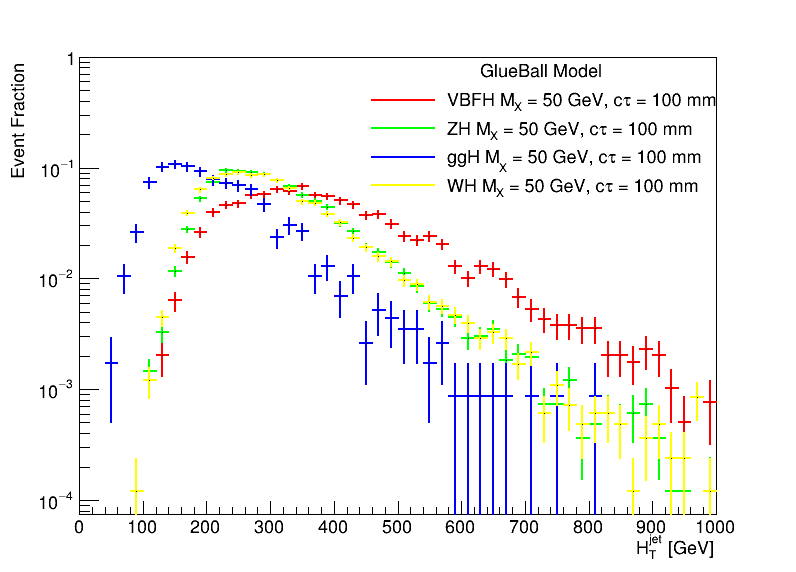

In [48]:
import os
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import numpy.ma as ma
import operator
from matplotlib import pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from prettytable import PrettyTable
import math


fpath = {}
label = {}
tree = {}
process = {}
process_short = {}


headout_dir = '/home/maojiajing/cernbox/www/LLP/20190313' 
#fpath['ggHm50ct100mmWISR'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_ggH_withISR_m50_pl100.root'
#fpath['VBFHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hjj_m50_pl1000.root'
#fpath['WHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl100.root'
#fpath['WHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hw_m50_pl1000.root'
#fpath['ZHm50ct1000mm'] = '/home/maojiajing/cms-llp/samples/signal/20190221glueball/jetNtuple_glueball_hz_m50_pl1000.root'

fpath['ggHm50ct100mmWISR'] = '/home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_ggh_withISR_M-50_CTau-100mm.root'
fpath['VBFHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_vbfh_M-50_CTau-100mm.root'
fpath['WHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_wh_M-50_CTau-100mm.root'
fpath['ZHm50ct100mm'] = '/home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_zh_M-50_CTau-100mm.root'

label['ggHm50ct100mmWISR'] = 'ggH M_{X} = 50 GeV, c#tau = 100 mm'
label['VBFHm50ct100mm'] = 'VBFH M_{X} = 50 GeV, c#tau = 100 mm'
label['WHm50ct100mm'] = 'WH M_{X} = 50 GeV, c#tau = 100 mm'
#label['WHm50ct1000mm'] = 'WH M_{X} = 50 GeV, c#tau = 1000 mm' 
label['ZHm50ct100mm'] = 'ZH M_{X} = 50 GeV, c#tau = 100 mm'

#print len(fpath)
n=len(fpath)

frac_result = {}

class Bauble:
    def __init__(self):
        pass

#gen level
ten_gen_var = {}
n_gen=1000

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    #for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
    print 'num of Gen Jets = ',tree[k]['nGenJets']
    nGenJets = tree[k]['nGenJets']
    for v in ['genJetE', 'genJetPt','genJetEta', 'genJetPhi']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['genJetPt'][:,4]

    #4-variables for jet
    jet_pt  = ten_gen_var['genJetPt']
    #print jet_pt
    jet_eta = ten_gen_var['genJetEta']
    jet_phi = ten_gen_var['genJetPhi']
    jet_e = ten_gen_var['genJetE']


    #GOTTA get some TLorentz Vectors for the jets
    genJet_p4_sum = rt.TLorentzVector()
    genJet_p4_temp = rt.TLorentzVector()
    
    HT = []

    #print(len(nGenJets))
    for i in range(len(nGenJets)):
        #print nGenJets[i]
        sum = 0.
        for j in range(nGenJets[i]):
            #print j
            #if(i==0):
                #print jet_pt[i][j]
            sum += math.fabs(jet_pt[i][j])  
        HT.append(sum)
            
        if(i<10):
            print 'HT',sum
    
        
    #for i in range(len(jet_pt)):
    '''
        tmp_p4_jet    = rt.TLorentzVector()
        tmp_p4_jet.SetPtEtaPhiE(jet_pt[i],jet_eta[i],jet_phi[i], jet_e[i])
        #print jet_pt[i],jet_eta[i],jet_phi[i], jet_e[i]
        jets_p4.append(tmp_p4_jet)
        
        genJet_p4_temp.append(genJet_p4_temp+tmp_p4_jet)
        
        tmp_pt_jet    = 0.
        tmp_pt_jet = jet_pt[i] 
        #print jet_pt[i],jet_eta[i],jet_phi[i], jet_e[i]
        jets_pt.append(tmp_pt_jet)
        
        genJet_pt_temp.append(genJet_pt_temp+tmp_pt_jet)

'''
        
     
    h['jet_ht'+str(k)] = create_TH1D(HT, axis_title=['H_{T}^{jet} [GeV]', 'Event Fraction'], name='', binning=[50,0,1000])
    h['jet_ht'+str(k)].SetLineColor(cnt+2)
    h['jet_ht'+str(k)].SetStats(0)
    #h['llp_pt'+str(k)].SetMaximum(10*h['llp_pt'+str(k)].GetMaximum())
    h['jet_ht'+str(k)].Scale(1/h['jet_ht'+str(k)].Integral())
    h['jet_ht'+str(k)].SetLineWidth(2)
    h['jet_ht'+str(k)].SetMaximum(1)
    h['jet_ht'+str(k)].Draw('same')

  
    legall.AddEntry(h['jet_ht'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/jet_ht.png')

    
  
    #cnt +=1
    #print cnt

In [57]:
 

h = {}
c = rt.TCanvas('c','C', 800, 600)
legall = rt.TLegend(0.45,0.65,0.9,0.90)
legall.SetFillStyle(0)
legall.SetBorderSize(0)
legall.SetHeader("GlueBall Model",'C')


cnt = 0
for k,v in fpath.iteritems():
    print k, v, cnt
    tree[k] = rtnp.root2array(v)
    #Create Numpy Arrays for (['gParticlePt', 'gParticleEta', 'gParticlePhi', 'gParticleE']) up to the 10th gen-particle
    #for v in ['gParticleId', 'gParticlePt','gParticleEta', 'gParticlePhi', 'gParticleE']:
    print 'num of Gen Jets = ',tree[k]['nGenJets']
    nGenJets = tree[k]['nGenJets']
    for v in ['genJetE', 'genJetPt','genJetEta', 'genJetPhi']:
        tmp_2 = []
        for x in tree[k][v]:
        #print x
            aux = -999*np.ones(n_gen)
            for i, xx in enumerate(x):
                #print xx
                if i >= n_gen:
                    break
                aux[i] = xx
            tmp_2.append(aux)

        ten_gen_var[v] = np.array(tmp_2)#numpy array (n_entries,4)
    #print ten_gen_var['genJetPt'][:,4]

    #4-variables for jet
    jet_pt  = ten_gen_var['genJetPt']
    #print jet_pt
    jet_eta = ten_gen_var['genJetEta']
    jet_phi = ten_gen_var['genJetPhi']
    jet_e = ten_gen_var['genJetE']


    #GOTTA get some TLorentz Vectors for the jets
    genJet_p4_sum = rt.TLorentzVector()
    genJet_p4_temp = rt.TLorentzVector()
    
    HT = []
    MHT = []
    MHT_pt = []

    #print(len(nGenJets))
    for i in range(len(nGenJets)):
        #print nGenJets[i]
        sum = 0.
        for j in range(nGenJets[i]):
            #print j
            #if(i==0):
                #print jet_pt[i][j]
            sum += math.fabs(jet_pt[i][j]) 
            tmp_p4_jet    = rt.TLorentzVector()
            tmp_p4_jet.SetPtEtaPhiE(jet_pt[i][j],jet_eta[i][j],jet_phi[i][j], jet_e[i][j])
        #for j in range(nGenJets[i]):
            genJet_p4_temp += tmp_p4_jet
        HT.append(sum)
        MHT.append(genJet_p4_temp)
        
            
        #if(i<10):
            #print 'HT',sum
    
    jet_mht_pt = [x.Pt() for x in MHT]   

        
     
    h['jet_mht_pt'+str(k)] = create_TH1D(jet_mht_pt, axis_title=['MHT_p{T}^{jet} [GeV]', 'Event Fraction'], name='', binning=[50,0,1000])
    h['jet_mht_pt'+str(k)].SetLineColor(cnt+2)
    h['jet_mht_pt'+str(k)].SetStats(0)
    #h['llp_pt'+str(k)].SetMaximum(10*h['llp_pt'+str(k)].GetMaximum())
    h['jet_mht_pt'+str(k)].Scale(1/h['jet_mht_pt'+str(k)].Integral())
    h['jet_mht_pt'+str(k)].SetLineWidth(2)
    h['jet_mht_pt'+str(k)].SetMaximum(1)
    h['jet_mht_pt'+str(k)].Draw('same')

  
    legall.AddEntry(h['jet_mht_pt'+str(k)],str(label[k]),'l')
    
    cnt += 1
    
#c.SetTitle('LLP_#eta')
legall.Draw('same')
c.SetLogy()
c.Draw()
c.SaveAs(headout_dir+'/jet_ht.png')

    
  
    #cnt +=1
    #print cnt

VBFHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_vbfh_M-50_CTau-100mm.root 0
num of Gen Jets =  [27 20 22 ... 25 13 27]
ZHm50ct100mm /home/maojiajing/cms-llp/samples/signal/20190313glueball/jetNtuple_glueball_zh_M-50_CTau-100mm.root 1
num of Gen Jets =  [28 26  6 ... 16 15 30]


ZeroDivisionError: float division by zero

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [ ]:
    #for i in range(len(jet_pt)):
    '''
        tmp_p4_jet    = rt.TLorentzVector()
        tmp_p4_jet.SetPtEtaPhiE(jet_pt[i],jet_eta[i],jet_phi[i], jet_e[i])
        #print jet_pt[i],jet_eta[i],jet_phi[i], jet_e[i]
        jets_p4.append(tmp_p4_jet)
        
        genJet_p4_temp.append(genJet_p4_temp+tmp_p4_jet)
        
        tmp_pt_jet    = 0.
        tmp_pt_jet = jet_pt[i] 
        #print jet_pt[i],jet_eta[i],jet_phi[i], jet_e[i]
        jets_pt.append(tmp_pt_jet)
        
        genJet_pt_temp.append(genJet_pt_temp+tmp_pt_jet)

'''